# Установка и имортирование библиотек

In [ ]:
%%capture
!pip install catboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier

# from sklearn.pipeline import make_pipeline
# from sklearn.ensemble import IsolationForest
# from sklearn.preprocessing import StandardScaler

# from sklearn.svm import OneClassSVM
# import pytz

# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import LabelEncoder

# from lightgbm import LGBMClassifier

# Задача №2: классификация товаров

## Бизнес-контекст

Задача классификации товаров предоставляет бизнесу ценные инструменты для повышения эффективности, лучшего понимания клиентов и более успешного выстраивания стратегий продаж.

Эффективная классификация товаров позволит создать персонализированные рекомендации, подстроенные под потребности конкретного пользователя. Это, в свою очередь, повысит вероятность успешных покупок и улучшит общее взаимодействие с платформой.

Благодаря анализу классификации товаров, бизнес сможет оптимизировать свой ассортимент, выявив наиболее востребованные категории. Также, это предоставит возможность эффективнее управлять партнерскими отношениями, выделяя успешных продавцов в различных категориях товаров.

Такое предприятие не только повысит конверсию, упрощая выбор и покупку для пользователей, но и поднимет конкурентоспособность платформы в глазах клиентов, привлекая новых пользователей и укрепляя позиции на рынке.



## Формальное описание задачи:

Разработать сервис классификации продуктов на основе имеющихся данных.

## Датасет

[dataset2.zip](https://github.com/yanchick/Practice-ML-DEV/blob/master/cases/case_2/dataset2.zip) (617 KB)

# Анализ таблицы:

In [ ]:
df = pd.read_csv('/content/pricerunner_aggregate.csv')
df.head(5)

,Product ID,Product Title,Merchant ID,Cluster ID,Cluster Label,Category ID,Category Label
0,1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


In [ ]:
# Общий размер таблицы
df.shape

(35311, 6)

Датасет включает в себя **35311** предложений о продуктах из **10** категорий, предоставленных **306** разными продавцами.

Целевые перемнные - номер категории **Category ID** и ее название **Category Label**.

### Общая информация всей таблицы

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Product ID       35311 non-null  int64 
 1   Product Title    35311 non-null  object
 2    Merchant ID     35311 non-null  int64 
 3    Cluster ID      35311 non-null  int64 
 4    Cluster Label   35311 non-null  object
 5    Category ID     35311 non-null  int64 
 6    Category Label  35311 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.9+ MB


In [ ]:
# Описательная статистика по каждому столбцу
pd.set_option('display.float_format', lambda x:'%.3f'%x)
df.describe(include='all')

,Product ID,Product Title,Merchant ID,Cluster ID,Cluster Label,Category ID,Category Label
count,35311.000,35311,35311.000,35311.000,35311,35311.000,35311
unique,NaN,30993,NaN,NaN,12849,NaN,10
top,NaN,washing machine,NaN,NaN,Canon IXUS 185,NaN,Fridge Freezers
freq,NaN,90,NaN,NaN,27,NaN,5501
mean,26150.800,NaN,120.502,30110.688,NaN,2618.143,NaN
std,13498.191,NaN,117.046,18410.266,NaN,3.601,NaN
min,1.000,NaN,1.000,1.000,NaN,2612.000,NaN
25%,14958.500,NaN,17.000,6123.000,NaN,2615.000,NaN
50%,27614.000,NaN,75.000,40630.000,NaN,2619.000,NaN
75%,37508.500,NaN,253.000,44059.000,NaN,2622.000,NaN


### Проверка на пустые значения и дубликаты

In [ ]:
df.isnull().sum()

Product ID         0
Product Title      0
 Merchant ID       0
 Cluster ID        0
 Cluster Label     0
 Category ID       0
 Category Label    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

**Вывод:**

Пустые значения и дубликаты отсутствуют.

## Основные графики

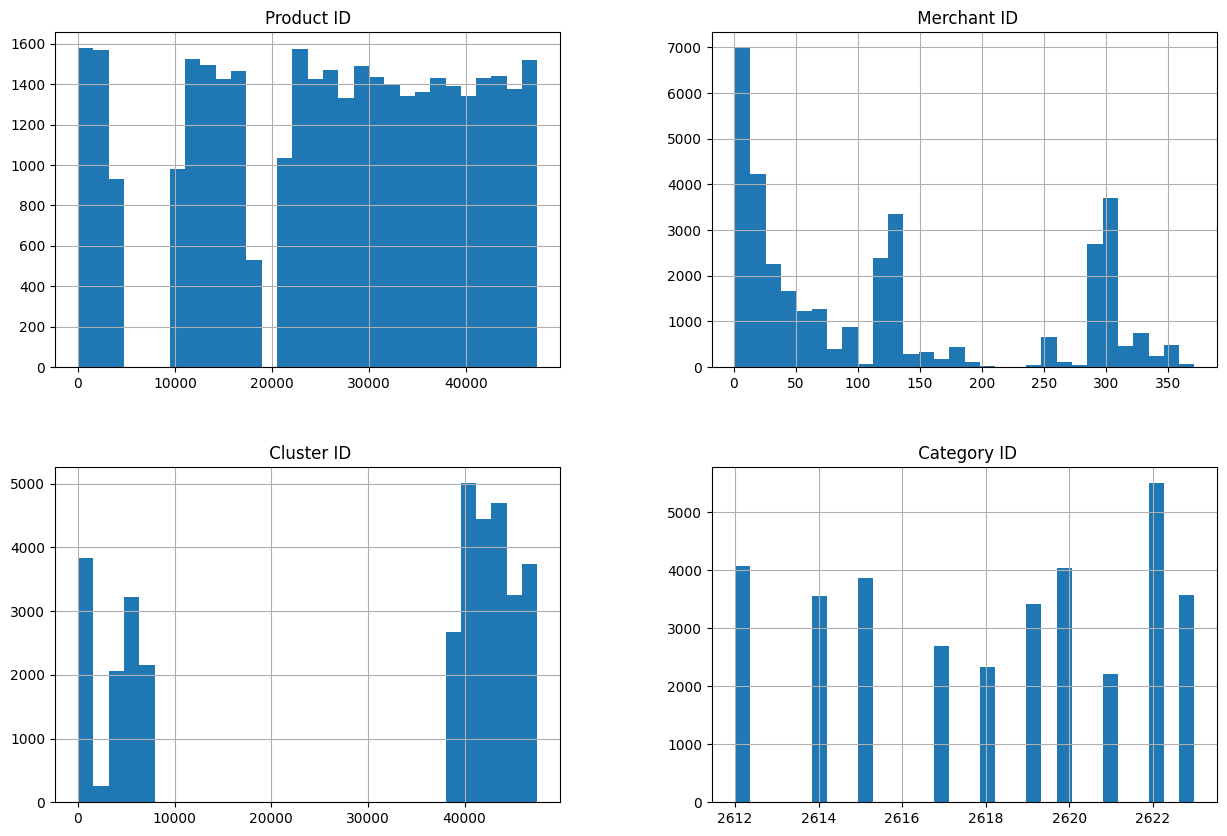

In [ ]:
df.hist(bins=30, figsize=(15, 10))
plt.show()

### Корреляция данных

In [ ]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,Merchant_ID,Cluster_ID,Category_ID
Merchant_ID,1.000,0.469,0.471
Cluster_ID,0.469,1.000,0.928
Category_ID,0.471,0.928,1.000


<Axes: >

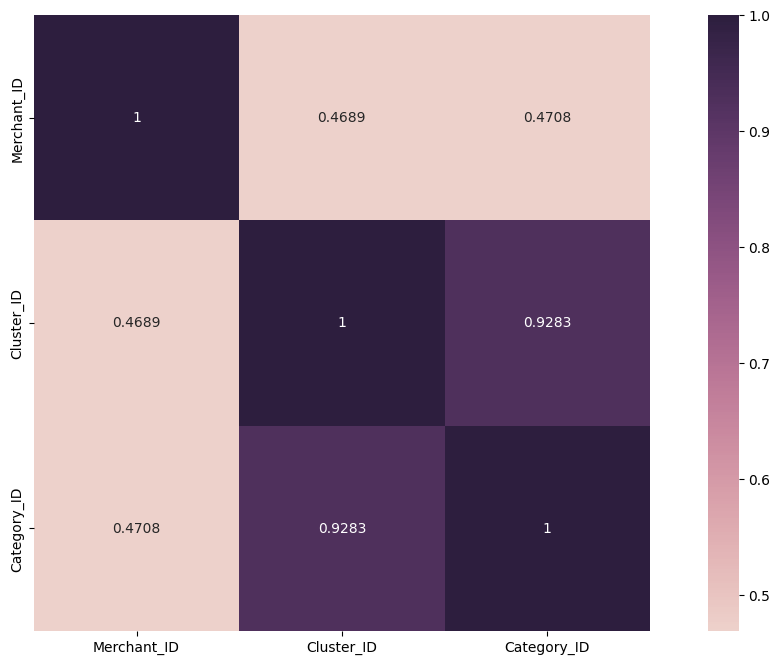

In [ ]:
plt.subplots(figsize=(15,8))
fig=sns.heatmap(corr_matrix, annot=True, square=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt='.4g')
fig

# Разбор каждого столбца

In [ ]:
# Переменование названий столбцов, чтобы в них не было пробелов

df.columns = ['Product_ID', 'Product_Title', 'Merchant_ID', 'Cluster_ID',
              'Cluster_Label', 'Category_ID', 'Category_Label']

In [ ]:
df.head(1)

,Product_ID,Product_Title,Merchant_ID,Cluster_ID,Cluster_Label,Category_ID,Category_Label
0,1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


## **1. Product ID** - ID продукта

In [ ]:
df.head(1)

,Product_Title,Merchant_ID,Cluster_ID,Cluster_Label,Category_ID,Category_Label
Product_ID,,,,,,
1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


In [ ]:
# Проверка на уникальность всех значений
df['Product_ID'].is_unique

True

Данный столбец не информативный. Так как все его значения уникальны для каждой строки.

И можнно заменить индексы на значения данного столбца. Тем самым информация не потеряется.

In [ ]:
df = df.set_index('Product_ID')
df.head(5)

,Product_Title,Merchant_ID,Cluster_ID,Cluster_Label,Category_ID,Category_Label
Product_ID,,,,,,
1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


## 2. **Product Title** - Название продукта

In [ ]:
df.head(1)

,Product_Title,Merchant_ID,Cluster_ID,Cluster_Label,Category_ID,Category_Label
Product_ID,,,,,,
1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


### Общая статистика столбца

In [ ]:
df['Product_Title'].describe()

count               35311
unique              30993
top       washing machine
freq                   90
Name: Product_Title, dtype: object

Из **35311** значений **30993** уникальных. Самое полуряное - **washing machine** имеет **90** позиий.

### Количество уникальных позиций

In [ ]:
# Кол-во уникальных позиций
df['Product_Title'].nunique()

30993

In [ ]:
df['Product_Title'].value_counts()

washing machine                                                     90
built in fully integrated dishwasher                                35
frost free fridge freezer                                           34
washer dryer                                                        24
american fridge freezer                                             22
                                                                    ..
cyber shot rx10 ii                                                   1
sony dsc rx10 ii 20.2 mp 8.3x zoom bridge camera black               1
sony dsc rx10 ii                                                     1
sony cyber shot dsc rx10 ii high performance bridge camera black     1
neff k4316x7gb built under larder fridge                             1
Name: Product_Title, Length: 30993, dtype: int64

### 30 самых популярных продуктов

In [ ]:
top30_product = df['Product_Title'].value_counts(dropna=False).nlargest(30)
top30_product

washing machine                                                           90
built in fully integrated dishwasher                                      35
frost free fridge freezer                                                 34
washer dryer                                                              24
american fridge freezer                                                   22
static integrated fridge freezer                                          18
static fridge freezer                                                     17
built in semi integrated dishwasher                                       15
hp intel xeon quad core e5506 2.13ghz fio kit 2.13ghz 4mb l2              14
frost free integrated fridge freezer                                      11
1400rpm washing machine 8kg load class a white                            11
1400rpm washing machine 9kg load class a white                            11
hewlett packard enterprise intel xeon e5 2630l 2ghz 15mb l3 processor     10

## 3. **Merchant ID** - Идентификатор продавца

In [ ]:
df.head(1)

,Product_Title,Merchant_ID,Cluster_ID,Cluster_Label,Category_ID,Category_Label
Product_ID,,,,,,
1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


### Количество уникальных позиций

In [ ]:
# Кол-во уникальных позиций
df['Merchant_ID'].nunique()

306

In [ ]:
df['Merchant_ID'].value_counts()

3      2547
6      1591
298    1523
31     1350
119    1239
       ... 
37        1
200       1
296       1
127       1
371       1
Name: Merchant_ID, Length: 306, dtype: int64

График распределения топ 30 продкутов в зависимости от продовцов

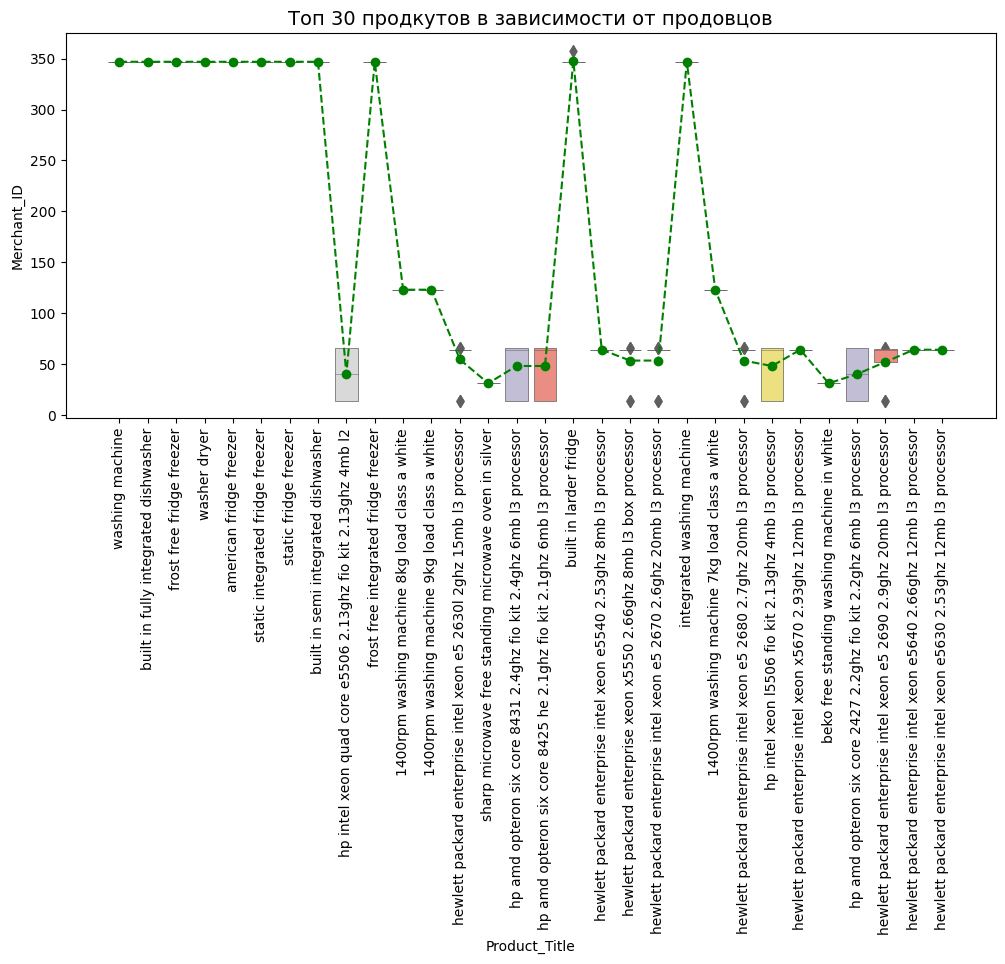

In [ ]:
_df = df[df['Product_Title'].isin(top30_product.index)]
profession_ranking = list(top30_product.index)

f, ax = plt.subplots(figsize=(12,5))
ax = sns.boxenplot(x="Product_Title", y="Merchant_ID",
              color="gray",  palette="Set3", order=profession_ranking,
              scale="linear", data=_df, linewidth=0.5)

ax.tick_params(axis='x', rotation=90)
ax.set_title("Топ 30 продкутов в зависимости от продовцовв", fontsize=14)

means = _df.groupby("Product_Title")["Merchant_ID"].mean().loc[profession_ranking]
_ = plt.plot(range(len(profession_ranking)), means, marker="o", color="green", markersize=6, linestyle="--")

## 4. **Cluster_ID**	- Идентификатор кластера

In [ ]:
df.head(1)

,Product_Title,Merchant_ID,Cluster_ID,Cluster_Label,Category_ID,Category_Label
Product_ID,,,,,,
1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


### Количество уникальных позиций

In [ ]:
# Кол-во уникальных позиций
df['Cluster_ID'].nunique()

13233

In [ ]:
df['Cluster_ID'].value_counts()

38848    27
4419     24
38849    24
1        23
4425     23
         ..
41460     1
41461     1
41462     1
41463     1
47525     1
Name: Cluster_ID, Length: 13233, dtype: int64

## 4. **Cluster_Label**	- Наименование

In [ ]:
df.head(1)

,Product_Title,Merchant_ID,Cluster_ID,Cluster_Label,Category_ID,Category_Label
Product_ID,,,,,,
1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


### Количество уникальных позиций

In [ ]:
# Кол-во уникальных товаров
df['Cluster_Label'].nunique()

12849

In [ ]:
df['Cluster_Label'].value_counts()

Canon IXUS 185              27
Canon PowerShot SX730 HS    24
Samsung UE49NU7100          24
Apple iPhone 8 Plus 64GB    23
Samsung UE65NU7100          23
                            ..
Panasonic TX-65FX600B        1
Samsung HG55ED890WB          1
Samsung UE55MU6192           1
Panasonic TX-24D302B         1
Neff K4316                   1
Name: Cluster_Label, Length: 12849, dtype: int64

In [ ]:
# 30 самых популярных продуктов
top30_prod = df['Cluster_Label'].value_counts(dropna=False).nlargest(30)
top30_prod

Canon IXUS 185               27
Canon PowerShot SX730 HS     24
Samsung UE49NU7100           24
Apple iPhone 8 Plus 64GB     23
Samsung UE65NU7100           23
Samsung UE75NU7100           23
Canon IXUS 285 HS            23
Samsung UE43NU7400           22
Apple iPhone 7 Plus 32GB     22
Apple iPhone 8 64GB          22
Apple iPhone 7 32GB          22
Apple iPhone X 64GB          21
Samsung UE65NU7400           21
Samsung UE65NU8000           21
Apple iPhone X 256GB         21
Samsung UE55NU8000           21
Samsung Galaxy S8 64GB       21
Bosch WIW28300GB             21
Canon PowerShot SX620 HS     20
Samsung UE55NU7400           20
Samsung UE49NU8000           20
Samsung UE40NU7120           20
Doro 5030                    20
Apple iPhone 7 128GB         20
Apple iPhone 8 256GB         20
Samsung UE82NU8000           19
Bosch SMS25AW00G White       19
Panasonic Lumix DMC-FT30     19
Apple iPhone 7 Plus 128GB    19
Samsung Galaxy S8+ 64GB      19
Name: Cluster_Label, dtype: int64

## 6. **Category_ID** - Идентификатор категории

In [ ]:
df.head(1)

,Product_Title,Merchant_ID,Cluster_ID,Cluster_Label,Category_ID,Category_Label
Product_ID,,,,,,
1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


In [ ]:
# Кол-во уникальных товаров
df['Category_ID'].nunique()

10

In [ ]:
df['Category_ID'].value_counts()

2622    5501
2612    4081
2620    4044
2615    3862
2623    3584
2614    3564
2619    3424
2617    2697
2618    2342
2621    2212
Name: Category_ID, dtype: int64

## На графике

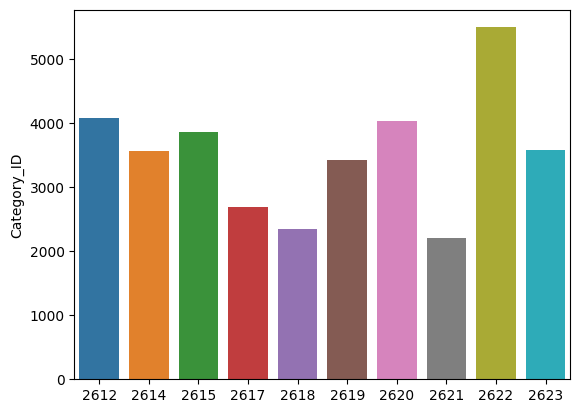

In [ ]:
sns.barplot(
    x=df["Category_ID"].value_counts().index,
    y=df["Category_ID"].value_counts())
plt.show()

**Вывод:**

Как видно, есть небольшой дисбаланс классов. Есть категории, в которых по кол-ву более чем в 2 раза меньше значений.

## 7. **Category_Label** - Наименование категории

In [ ]:
df.head(1)

,Product_Title,Merchant_ID,Cluster_ID,Cluster_Label,Category_ID,Category_Label
Product_ID,,,,,,
1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


In [ ]:
# Кол-во уникальных товаров
df['Category_Label'].nunique()

10

In [ ]:
df['Category_Label'].value_counts()

Fridge Freezers     5501
Mobile Phones       4081
Washing Machines    4044
CPUs                3862
Fridges             3584
TVs                 3564
Dishwashers         3424
Digital Cameras     2697
Microwaves          2342
Freezers            2212
Name: Category_Label, dtype: int64

## На графике

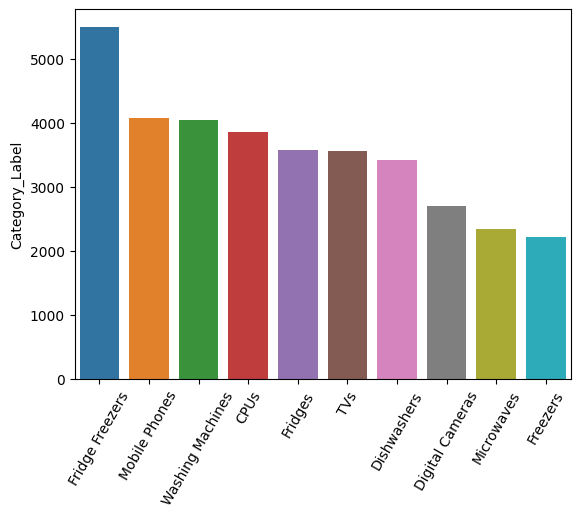

In [ ]:
sns.barplot(
    x=df["Category_Label"].value_counts().index,
    y=df["Category_Label"].value_counts())

plt.xticks(rotation=60)
plt.show()

## Проверка других столбцов на схожесть

In [ ]:
df['Cluster_ID'].nunique()

13233

In [ ]:
df['Cluster_Label'].nunique()

12849

### Выводы:

1. Был сделан общий анализ всей таблицы, а так же каждого отдельного столбца.
2. В столбцах `category_id` и `category_label` содержатся одинаковая информация:
 - category_id - числове значение
 - category_label - текстовое значение

3. В столбцах `cluster_label` и `cluster_id` разное кол-во уникальных элементов, следовательно они различны.

4. Самое большая категория : **Fridge Freezers** (Холодильник с морозильной камерой) - 5501
5. Самая маленькая категория: **Freezers** (Морозильники) - 2212

# **Models**

In [ ]:
df = pd.read_csv('/content/pricerunner_aggregate.csv')
df.columns = ['Product_ID', 'Product_Title', 'Merchant_ID', 'Cluster_ID',
              'Cluster_Label', 'Category_ID', 'Category_Label']
df = df.set_index('Product_ID')

df['Product_Title'] = df['Product_Title'].str.lower()

category_id_unique = df['Category_ID'].unique()
for i in range(len(category_id_unique)):
  df['Category_ID'] = df['Category_ID'].replace({category_id_unique[i]: i+1})

In [ ]:
df.shape

(35311, 6)

In [ ]:
# Просмотр таблицы перед изменениями
df.sample(10)

,Product_Title,Merchant_ID,Cluster_ID,Cluster_Label,Category_ID,Category_Label
Product_ID,,,,,,
12153,grade b cello c22230t2 22 inch full hd led tv ...,30,4749,Cello C22230T2,2614,TVs
41010,hoover hcs5172xk 50/50 fridge freezer inox,7,44693,Hoover HCS 5172XK Stainless Steel,2622,Fridge Freezers
46185,neff k 425 a2 integrierbar 183l/17l eek a skal...,297,46709,Neff K1555X8 Integrated,2623,Fridges
43931,siemens ki81raf30g integrated fridge 319litres...,131,46173,Siemens KI81RAF30G Integrated,2623,Fridges
45551,iceking rk113ap2 48cm wide undercounter fridge...,152,46497,Ice King RK113AP2 White,2623,Fridges
16198,hp intel xeon e5640 2.66ghz 12mb smart cache p...,14,6554,HP Intel Xeon E5640 2.66GHz Upgrade Tray,2615,CPUs
16772,hp intel xeon e5540 2.53ghz 8mb l3 processor,14,6831,HP Intel Xeon Quad-core E5540 2.53GHz Socket 1...,2615,CPUs
525,doro 5516 graphit,2,32,Doro 5516,2612,Mobile Phones
2160,blackview bv7000 pro,21,397,Blackview BV7000 Pro Dual SIM,2612,Mobile Phones


## Предобработка

In [ ]:
# Перевод в нижний регистр столбца Product_Title
df['Product_Title'] = df['Product_Title'].str.lower()
#df['Cluster_Label'] = df['Cluster_Label'].str.lower()

In [ ]:
# Сохраняем уникальные значения столбца Category_ID
category_id_unique = df['Category_ID'].unique()
category_id_unique

array([2612, 2614, 2615, 2617, 2618, 2619, 2620, 2621, 2622, 2623])

Как видно уникальные номера категорий идут не по порядку и начинаются со значения 2612. Что очень не информативно.

Присвоим каждому уникальному значению число от **1** до **10**. И заменим в таблице на эти значения.

In [ ]:
for i in range(len(category_id_unique)):
  df['Category_ID'] = df['Category_ID'].replace({category_id_unique[i]: i+1})

In [ ]:
df.sample(10)

,Product_Title,Merchant_ID,Cluster_ID,Cluster_Label,Category_ID,Category_Label
Product_ID,,,,,,
32309,aeg l8fee945r washing machines,294,42125,AEG L8FEE945R,7,Washing Machines
2306,doogee s60 ip68 waterproof android 7.0 4g phon...,63,449,Doogee S60 Dual SIM,1,Mobile Phones
103,apple iphone x 5.8 single sim 4g 64gb silver,11,5,Apple iPhone X 64GB,1,Mobile Phones
10168,samsung ue55nu8000 55 4k ultra hd tv,129,4424,Samsung UE55NU8000,2,TVs
11014,bravia oled kd55af9 55 inch oled 4k ultra hd h...,124,4490,Sony KD-55AF9,2,TVs
14304,amd sempron 3850 1.3ghz 2mb 25w am1 radeon r3 ...,10,5920,AMD Sempron 3850 1.3GHz Box,3,CPUs
36704,static built in freezer,347,43663,Hotpoint HF 1801 E F AA.UK.1 Integrated,8,Freezers
15078,intel celeron g3930 2 90ghz lga1151 2mb cache ...,3,6165,Intel Celeron G3930 2.9GHz Tray,3,CPUs
24825,russell hobbs rhm3003b combination microwave b...,7,39795,Russell Hobbs RHM3003B Black,5,Microwaves


In [ ]:
# Создание словаря. Где ключ это номер категории, а значение его наименование.
category_dict = dict(zip(df['Category_ID'], df['Category_Label']))
category_dict

{1: 'Mobile Phones',
 2: 'TVs',
 3: 'CPUs',
 4: 'Digital Cameras',
 5: 'Microwaves',
 6: 'Dishwashers',
 7: 'Washing Machines',
 8: 'Freezers',
 9: 'Fridge Freezers',
 10: 'Fridges'}

## Разделение на выборки

In [ ]:
RANDOM_STATE = 42

In [ ]:
# в x_train столбец с наименованием товара
# в y_train столбец с номером категории
X = df["Product_Title"]
Y = df["Category_ID"]

print(X.shape)
print(Y.shape)

(35311,)
(35311,)


In [ ]:
# Разделение на обучающую и проверочную выборки в соотношении 80/20.
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=RANDOM_STATE)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(28248,)
(28248,)
(7063,)
(7063,)


### TfIdf

In [ ]:
tfidf = TfidfVectorizer(
    max_features=10000, stop_words="english", ngram_range=(1, 4), lowercase=True
)
x_train = tfidf.fit_transform(x_train)
x_test = tfidf.transform(x_test)

print(x_train.shape)
print(x_test.shape)

(28248, 10000)
(7063, 10000)


### Сохранение

In [ ]:
with open("tfidf.pkl", "wb") as file:
    pickle.dump(tfidf, file)

## Model 1 - logistic regression

In [ ]:
log_reg = LogisticRegression(random_state=RANDOM_STATE, max_iter=1000)
log_reg.fit(x_train, y_train)
print(classification_report(y_test, log_reg.predict(x_test)))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       818
           2       0.97      0.99      0.98       723
           3       1.00      0.99      1.00       771
           4       1.00      1.00      1.00       542
           5       0.97      0.95      0.96       469
           6       0.89      0.95      0.92       662
           7       0.94      0.94      0.94       796
           8       0.98      0.91      0.94       439
           9       0.94      0.92      0.93      1115
          10       0.90      0.90      0.90       728

    accuracy                           0.95      7063
   macro avg       0.96      0.95      0.95      7063
weighted avg       0.95      0.95      0.95      7063



Сохранение

In [ ]:
with open("log_reg.pkl", "wb") as file:
    pickle.dump(log_reg, file)

## Model 2 - Naive Bayes

In [ ]:
naive_bayes = MultinomialNB()
naive_bayes.fit(x_train, y_train)
print(classification_report(y_test, naive_bayes.predict(x_test)))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       818
           2       0.97      0.99      0.98       723
           3       1.00      0.99      1.00       771
           4       0.99      1.00      0.99       542
           5       1.00      0.94      0.97       469
           6       0.88      0.94      0.91       662
           7       0.95      0.94      0.94       796
           8       0.98      0.77      0.87       439
           9       0.85      0.92      0.88      1115
          10       0.88      0.85      0.86       728

    accuracy                           0.94      7063
   macro avg       0.95      0.93      0.94      7063
weighted avg       0.94      0.94      0.94      7063



Сохранение

In [ ]:
with open("naive_bayes.pkl", "wb") as file:
    pickle.dump(naive_bayes, file)

## Model 3 - CatBoost

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
catboost = CatBoostClassifier(
    random_seed=RANDOM_STATE,
    iterations=1000,
    depth=5,
    learning_rate=0.15,
    eval_metric="TotalF1",
    use_best_model=True,
    task_type="GPU",
    devices="0:1",
)
catboost.fit(x_train, y_train, eval_set=(x_test, y_test), verbose=500, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.5116548	test: 0.5028745	best: 0.5028745 (0)	total: 121ms	remaining: 2m 1s
500:	learn: 0.9443926	test: 0.9333077	best: 0.9333158 (475)	total: 29.2s	remaining: 29s
999:	learn: 0.9497578	test: 0.9369472	best: 0.9369579 (984)	total: 57.3s	remaining: 0us
bestTest = 0.9369579262
bestIteration = 984
Shrink model to first 985 iterations.


In [ ]:
# Вывод результата
print(classification_report(y_test, catboost.predict(x_test)))

              precision    recall  f1-score   support

           1       0.87      1.00      0.93       818
           2       0.97      0.97      0.97       723
           3       1.00      0.99      0.99       771
           4       0.99      0.97      0.98       542
           5       0.97      0.92      0.95       469
           6       0.88      0.94      0.91       662
           7       0.94      0.92      0.93       796
           8       0.98      0.90      0.94       439
           9       0.94      0.89      0.92      1115
          10       0.88      0.86      0.87       728

    accuracy                           0.94      7063
   macro avg       0.94      0.94      0.94      7063
weighted avg       0.94      0.94      0.94      7063



Сохранение

In [ ]:
with open("catboost.pkl", "wb") as file:
    pickle.dump(catboost, file)

## Model 4 - RandomForestClassifier

In [ ]:
X_encoded = pd.get_dummies(X)

In [ ]:
X_train, X_test, Y_train,Y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)

In [ ]:
forest = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=42)
forest.fit(pd.DataFrame(X_train), Y_train)


RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [ ]:
pred_forest = forest.predict(X_test)

In [ ]:
acc_forest = accuracy_score(Y_test, pred_forest)
print(acc_forest)

0.15899759309075465


### Сохранение предобработанной таблицы

In [58]:
df.to_csv('processed_pricerunner_aggregate.csv')

# Выводы:

1. Были протестированы классификаторы:
- TfIdf
- logistic regression
- Naive Bayes
- CatBoost
- RandomForestClassifier

2. Выбраны и сохранены файлы в формате **.pkl** для дальнейшей работы у классификаторов:

- logistic regression
- Naive Bayes
- CatBoost

3. Сохранена преобработанная таблица с данными **processed_pricerunner_aggregate.csv**.